In [1]:
import tensorflow as tf
print(tf.__version__)

print('GPU Name : {}'.format(tf.test.gpu_device_name()))

2.2.0-rc3
GPU Name : /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [0]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [0]:
# imdb data object has two methods only load_data and get_word_index.
# Download and assign the data set using load_data()
# This command downloads the IMDb dataset from the tensorflow servers, saves it to your hard drive, and loads it into Python as numpy rows.

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [0]:

# Inspect the type of the data

type(x_train)

numpy.ndarray

In [0]:
# Inspect the shape of the data

x_train.shape

(25000,)

In [0]:
# Display the first dataset element input
# Notice encoding

x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [0]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [0]:
# Load the dataset with defaults
# The way the encoding works is that each word in the vocabulary is mapped to an integer representing its frequency rank.
# This rank is then adjusted by adding the index from value to it. 
# This mapping from vocabulary words to adjusted frequency ranks is called the dataset's word index.
imdb.load_data(path='imdb.npz', index_from=3)

# ~/.keras/dataset/

In [0]:
# Limit the vocabulary to the top 500 words using num_words
# if you wanted to include words of an adjusted frequency rank of less than 1,000, you would write num_words=1000.
# you might remove those 10 from a word index with a maximum adjusted frequency rank of 1000.

imdb.load_data(num_words=1000)

In [0]:
# Ignore the top 10 most frequent words using skip_top
# If you wanted to remove the ten most frequent words, you would write skip_top=10, if you feel they are not valuable.
# Words that aren't in the word index are mapped to the value of the OOVI char argument of load data. By default, its 2


imdb.load_data(skip_top=10, num_words=1000, oov_char=2)

In [0]:
# Limit the sequence lengths to 500 using maxlen
# You can also set the maximum review length using the max line argument. 

imdb.load_data(maxlen=500)

In [0]:
# Use '1' as the character that indicates the start of a sequence
# You can also configure the number that indicates the start of a sequence via start char.
# his character will appear at the beginning of every sequence in the downloaded dataset. By default it is equal to 1.

imdb.load_data(start_char=1)

#### Explore the dataset word index

In [0]:
# Load the imdb word index using get_word_index()
# This method downloads the complete frequency ranking of words in the whole IMDb data et. 

imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
# View the word index as a dictionary,
# accounting for index_from.
# To use the word index to decode reviews, you need to adjust the indices by the index from value in load data. By default, this is equal to 3.
# To make the adjustment, simply overwrite the existing word index with a dictionary with the same keys and the values adjusted by the index from value.

index_from = 3
imdb_word_index = {key:value + index_from for key, value in imdb_word_index.items()}

In [0]:
# Retrieve a specific word's index
imdb_word_index['simpsonian']


52256

In [0]:
imdb_word_index['the']

4

In [0]:
# View an input sentence
# Now on to decoding a review. Since the Python dictionary is indexed by its keys, we need to swap the keys and values of the word index object.

inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}

# You can then decode a review by passing a sequence of indices to the inverted word index. 
# The last condition is necessary since the word index does not know of the sequence start value nor the out of vocabulary value.

[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [0]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [0]:
# Load the imdb data set
import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()


#### Preprocess the data with padding

In [0]:
# Inspect the input data shape
# Its ragged ndarray

x_train.shape

(25000,)

In [0]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')

In [0]:
# Inspect the output data shape
# Now its proper rectangular array with 300 columns.
# The default padding value for pad sequences is 0
# Padding values are non-informative about our sequences contents. 
# To allow recurrent units to identify and skip padding values you can include a masking layer in your model.

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [0]:
# Import numpy 

import numpy as np


In [0]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims
# if we're currently sees that all values at a time step across a batch are masked, the layer will skip that time step.

padded_x_train = np.expand_dims(padded_x_train, -1)

In [0]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [0]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [0]:
# Look at the dataset

tf_x_train

<tf.Tensor: shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [0]:
masked_x_train

<tf.Tensor: shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [0]:
# Look at the ._keras_mask for the dataset

tf_x_train._keras_mask

AttributeError: ignored

In [0]:
# in this tensor, true locate real sequence values, whereas false locates padding values.
# It's this property keras mask that recurrent layers refer to when deciding whether or not to skip a time step in a batch.

masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [0]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [0]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)
# Passing a single sequence of indices to our embedding layer so we can see how each entry in the sequence is being mapped to it's embedding.
# Create the sequence, sequence of indices using tf.constant,
# and create a batch containing a single sequence with each feature vector in the sequence containing a single value, with the values being 0, 1, 5, and 500. 
# Notice that I've created a feature dimension in spite of the fact that the sequence only contains a single value at each time step. 
# This is because the embedding layer expected inputs of shape, batch sequence features. 
# Pass the sequence of indices to embedding layer and save the output to sequence of embeddings.
# You can see from the output that the sequence length has remained the same while the indices have been replaced by their embeddings, each of which is a 16-dimensional vector

sequence_of_indices = tf.constant([[[0],[1],[5],[500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.04872428,  0.04241559, -0.02356823, -0.0453388 ,
          -0.00788896,  0.01631159, -0.00510161,  0.02773961,
           0.03793502,  0.02912446, -0.02531645, -0.01535088,
           0.03700543, -0.02077115, -0.03227865,  0.00406898]],

        [[-0.01552264, -0.03632841, -0.02872068,  0.03257276,
          -0.04046204,  0.03059119, -0.01759539,  0.01969856,
           0.0214942 ,  0.03030428,  0.0393054 ,  0.03906641,
           0.00290219,  0.03962889, -0.01857651, -0.00889333]],

        [[-0.04934983, -0.03918725, -0.00555604, -0.02095532,
           0.01045794,  0.02950301,  0.01630105,  0.03874901,
          -0.04243469,  0.00859357,  0.00643158,  0.02742912,
          -0.04584656,  0.02673521,  0.01374116,  0.02838203]],

        [[-0.04761389, -0.01296924, -0.04377239, -0.03798524,
           0.0114585 ,  0.02688969, -0.0088779 ,  0.03528554,
           0.0262918 , -0.02446668,  0.01561806,  0.04382229,
      

In [0]:
from tensorflow.keras.layers import Embedding
import numpy as np 
embedding_layer = Embedding(1000,32,input_length = 64, mask_zero=True)
test_input = np.random.randint(1000, size=(16,64))
embedded_inputs = embedding_layer(test_input)
print(embedded_inputs)
embedded_inputs._keras_mask

tf.Tensor(
[[[-4.72978614e-02 -2.99745798e-02 -3.39182615e-02 ...  3.12484838e-02
    7.69959763e-03 -3.59261036e-02]
  [-4.44185995e-02 -1.05785243e-02  3.54325771e-03 ...  3.83838154e-02
   -4.54059988e-03 -3.88224125e-02]
  [ 2.57592537e-02 -4.53229658e-02  4.60560434e-02 ...  2.57410668e-02
    3.13606113e-03 -9.74640995e-03]
  ...
  [-2.76311524e-02  3.59730795e-03 -1.31364465e-02 ... -4.96701114e-02
    4.82204817e-02 -9.82445478e-03]
  [-2.92846803e-02  3.10540199e-05 -1.19088665e-02 ... -2.26016045e-02
    3.63291390e-02  4.24697883e-02]
  [ 4.42635678e-02 -3.13893445e-02  1.89867057e-02 ... -3.41523066e-02
    5.06749004e-03  2.06539147e-02]]

 [[-1.91206466e-02  2.92468704e-02 -1.80845633e-02 ... -4.13577780e-02
    1.68047659e-02  8.53818655e-03]
  [-1.91637874e-02  1.22662894e-02  4.34458256e-03 ... -3.70009765e-02
   -4.64978330e-02 -4.62268367e-02]
  [-7.08645582e-03 -4.12947908e-02  3.81530263e-02 ...  4.87723984e-02
   -2.18096375e-02 -4.24111485e-02]
  ...
  [ 4.518337

<tf.Tensor: shape=(16, 64), dtype=bool, numpy=
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])>

In [0]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[ 0.04872428,  0.04241559, -0.02356823, ..., -0.02077115,
        -0.03227865,  0.00406898],
       [-0.01552264, -0.03632841, -0.02872068, ...,  0.03962889,
        -0.01857651, -0.00889333],
       [ 0.01166313,  0.01567569, -0.01127052, ..., -0.02864438,
        -0.01276373, -0.00039077],
       ...,
       [-0.02727896, -0.01856013,  0.04692454, ..., -0.04542042,
        -0.01443933, -0.00460063],
       [-0.04997784,  0.0203336 , -0.00642265, ...,  0.03978759,
         0.02117715, -0.04200948],
       [-0.04761389, -0.01296924, -0.04377239, ..., -0.02495903,
         0.0016716 , -0.02700118]], dtype=float32)

In [0]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14,:]

array([-0.0451032 , -0.03019304, -0.00404735, -0.02187367, -0.03189258,
        0.04667951, -0.04117098,  0.04562496, -0.00720056, -0.0432821 ,
       -0.04140819, -0.0249688 ,  0.01154352, -0.00842356,  0.00499067,
       -0.03307437], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [0]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [0]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [0]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [0]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(25000, 2494)

In [0]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [0]:
# Get the word index

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value : key for key, value in imdb_word_index.items()}

In [0]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [0]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())

In [0]:
# Specify an embedding dimension

embedding_dim = 16

In [0]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value + 1, output_dim = embedding_dim, mask_zero=False),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(units = 1, activation='sigmoid')
])

In [0]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.Input((None,))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value + 1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(average_embedding)

model = tf.keras.Model(inputs = review_sequence, outputs = positive_probability)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [0]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)


Epoch 1/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6898 - accuracy: 0.5487 - val_loss: 0.6836 - val_accuracy: 0.7391
Epoch 2/5
782/782 [==============================] - 6s 7ms/step - loss: 0.6709 - accuracy: 0.6853 - val_loss: 0.6506 - val_accuracy: 0.7125
Epoch 3/5
782/782 [==============================] - 6s 7ms/step - loss: 0.6291 - accuracy: 0.7494 - val_loss: 0.6026 - val_accuracy: 0.7641
Epoch 4/5
782/782 [==============================] - 6s 7ms/step - loss: 0.5786 - accuracy: 0.7895 - val_loss: 0.5547 - val_accuracy: 0.7859
Epoch 5/5
782/782 [==============================] - 6s 7ms/step - loss: 0.5299 - accuracy: 0.8141 - val_loss: 0.5142 - val_accuracy: 0.7906


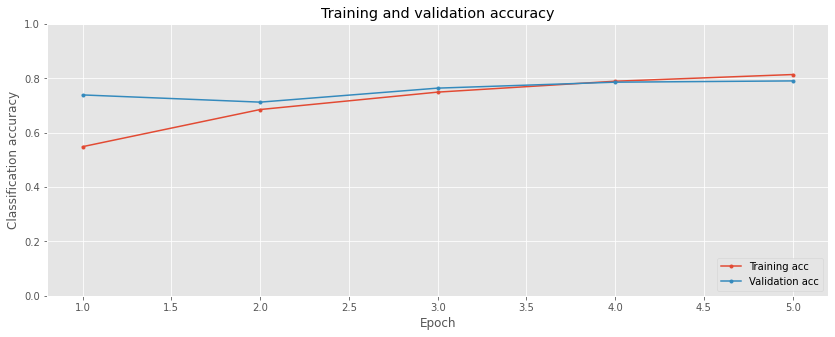

In [0]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [0]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [0]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open('/content/drive/My Drive/Colab Notebooks/vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('/content/drive/My Drive/Colab Notebooks/meta.tsv', 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [0]:
# Create a SimpleRNN layer and test it
# Expects an input of shape (batch, sequence, feature)
# By default, RNN layers only return the final output, not the entire sequence of outputs. 
# To see this, pass the batch containing a single sequence of two-dimensional vectors to the latter


simplernn_layer = tf.keras.layers.SimpleRNN(units=16)


In [0]:
# Note that only the final cell output is returned
# You can see that this layers output is a single vector of length 16. This is because their current layer contains 16 units.
# The sequence two-dimensional vectors has been mapped to a single 16 dimensional vector

sequence = tf.constant([[[1. , 1.], [2., 2.], [56. , -100.]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[-1.        , -1.        , -0.9909561 ,  1.        ,  1.        ,
        -1.        , -1.        , -0.99822575,  0.99959105, -1.        ,
         1.        ,  1.        , -0.97956085,  1.        , -1.        ,
        -1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [0]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [0]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [0]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


#### Create a recurrent neural network model

In [0]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [0]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value + 1, output_dim = embedding_dim, mask_zero=True),
                                    tf.keras.layers.LSTM(units=16),
                                    tf.keras.layers.Dense(units = 1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
lstm (LSTM)                  (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 162,145
Trainable params: 162,145
Non-trainable params: 0
_________________________________________________________________


#### Compile and fit the model

In [0]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
782/782 [==============================] - 411s 525ms/step - loss: 0.4098 - accuracy: 0.8085
Epoch 2/3
782/782 [==============================] - 410s 524ms/step - loss: 0.2268 - accuracy: 0.9133
Epoch 3/3
782/782 [==============================] - 411s 525ms/step - loss: 0.1761 - accuracy: 0.9368


#### Plot learning curves

In [0]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [0]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index > 2]

['ignore',
 'the',
 'bad',
 'reviews',
 'on',
 'here',
 'this',
 'film',
 'is',
 'awesome',
 'just',
 'before',
 'dawn',
 'is',
 'a',
 'great',
 'example',
 'of',
 'what',
 'can',
 'be',
 'done',
 'in',
 'a',
 'film',
 'with',
 'a',
 'minimal',
 'budget',
 'if',
 'you',
 'have',
 'a',
 'dedicated',
 'crew',
 'decent',
 'script',
 'and',
 'a',
 'cool',
 'idea',
 'for',
 'a',
 'film',
 "it's",
 'a',
 'hell',
 'of',
 'a',
 'lot',
 'of',
 'fun',
 'br',
 'br',
 'i',
 'enjoyed',
 'it',
 'a',
 'lot',
 'more',
 'than',
 'most',
 'other',
 "80's",
 'slashers',
 'because',
 'the',
 'killer',
 'is',
 'so',
 'unique',
 'wrong',
 'turn',
 'ripped',
 'this',
 'movie',
 'off',
 'something',
 'fierce',
 "there's",
 'plenty',
 'of',
 'blood',
 'and',
 'scares',
 'my',
 'girlfriend',
 'was',
 'freaked',
 'out',
 'and',
 'she',
 'watches',
 'almost',
 'everything',
 'with',
 'me',
 'and',
 "doesn't",
 "it's",
 'got',
 'that',
 'creepiness',
 'to',
 'it',
 'br',
 'br',
 "i'd",
 'say',
 'that',
 'just',
 '

In [0]:
# Get the model prediction using model.predict()

model.predict(x_test[None,0,:])

array([[0.9945374]], dtype=float32)

In [0]:
# Get the corresponding label

y_train[0]

1

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [0]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [5]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index(num_words=5000)

1646592/1641221 [==============================] - 0s 0us/step


#### Build stacked and bidirectional recurrent models

In [0]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [0]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.LSTM(units=32, return_sequences=True),
                             tf.keras.layers.LSTM(units=32, return_sequences=False),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [0]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8), merge_mode='sum', 
                                                           backward_layer=tf.keras.layers.GRU(units=8, go_backwards=True)),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [0]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8, return_sequences=True), merge_mode='concat'),
                             tf.keras.layers.GRU(units = 8, return_sequences=False),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#### Compile and fit the model

In [0]:
# Compile the model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
782/782 [==============================] - 1720s 2s/step - loss: 0.3773 - accuracy: 0.8277
Epoch 2/3
782/782 [==============================] - 1731s 2s/step - loss: 0.2364 - accuracy: 0.9096
Epoch 3/3
782/782 [==============================] - 1711s 2s/step - loss: 0.1877 - accuracy: 0.9295


In [13]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: ignored